In [46]:
#Importamos librerías de pandas, nunoy y matplotlib respectivamente.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df= pd.read_csv('listings_mexico.csv')

In [55]:
#Limpiamos el df para dejarlo sin nulos
df_limpio = df.fillna(0)

In [56]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26281 non-null  int64  
 1   listing_url                                   26281 non-null  object 
 2   scrape_id                                     26281 non-null  int64  
 3   last_scraped                                  26281 non-null  object 
 4   source                                        26281 non-null  object 
 5   name                                          26281 non-null  object 
 6   description                                   26281 non-null  object 
 7   neighborhood_overview                         26281 non-null  object 
 8   picture_url                                   26281 non-null  object 
 9   host_id                                       26281 non-null 

In [57]:
#Dividir el df en 2 partes una parte en cualitatvivas y una parte en cuantitativas (con esta función las separamos por tipo)
cuantitativas= df_limpio.select_dtypes(include=['number']) #number incluye int y float
cualitativas= df_limpio.select_dtypes(include=['object'])

In [58]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 41 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26281 non-null  int64  
 1   scrape_id                                     26281 non-null  int64  
 2   host_id                                       26281 non-null  int64  
 3   host_listings_count                           26281 non-null  float64
 4   host_total_listings_count                     26281 non-null  float64
 5   neighbourhood_group_cleansed                  26281 non-null  float64
 6   latitude                                      26281 non-null  float64
 7   longitude                                     26281 non-null  float64
 8   accommodates                                  26281 non-null  int64  
 9   bathrooms                                     26281 non-null 

In [59]:
#Verificamos que haya datos en la variable de cuantitativas
print(cuantitativas.shape)  # Verifica si tiene datos

(26281, 41)


<Figure size 1500x800 with 0 Axes>

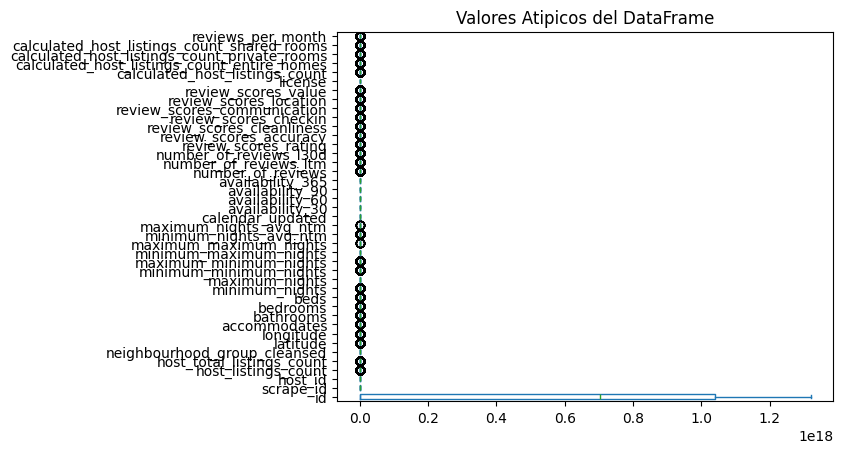

In [60]:
#Utilizamos funciones para realizar diagramas de caja de bigotes
fig= plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show()  #Dibujamos el diagrama

In [62]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 41 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26281 non-null  int64  
 1   scrape_id                                     26281 non-null  int64  
 2   host_id                                       26281 non-null  int64  
 3   host_listings_count                           26281 non-null  float64
 4   host_total_listings_count                     26281 non-null  float64
 5   neighbourhood_group_cleansed                  26281 non-null  float64
 6   latitude                                      26281 non-null  float64
 7   longitude                                     26281 non-null  float64
 8   accommodates                                  26281 non-null  int64  
 9   bathrooms                                     26281 non-null 

DESVIACIÓN ESTÁNDAR PARA ELIMINAR OUTLIERS EN EL DF

In [63]:
#Utilizamos regla empírica (3)
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido id                                              2.093941e+18
scrape_id                                       2.024123e+13
host_id                                         7.925644e+08
host_listings_count                             3.084680e+02
host_total_listings_count                       4.871598e+02
neighbourhood_group_cleansed                    0.000000e+00
latitude                                        1.953290e+01
longitude                                      -9.906703e+01
accommodates                                    1.040787e+01
bathrooms                                       4.630914e+00
bedrooms                                        5.450030e+00
beds                                            7.048504e+00
minimum_nights                                  7.562914e+01
maximum_nights                                  1.756125e+03
minimum_minimum_nights                          7.248703e+01
maximum_minimum_nights                          7.499606e+0

In [64]:
#Obtenemos datos y los outliers se convierten en nulos en el datafame
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,20241227033128,153786,1.0,1.0,0.0,19.382830,NaN,2.0,1.0,...,0.00,0.00,0.00,0.00,0.0,1.0,1.0,0.0,0.0,0.00
1,44616,20241227033128,196253,12.0,13.0,0.0,19.411620,-99.177940,NaN,NaN,...,4.87,4.78,4.98,4.48,0.0,8.0,4.0,1.0,0.0,0.40
2,67703,20241227033128,334451,3.0,4.0,0.0,19.411520,-99.168570,4.0,1.0,...,4.94,4.92,4.98,4.92,0.0,2.0,2.0,0.0,0.0,0.31
3,70644,20241227033128,212109,3.0,4.0,0.0,19.354480,-99.162170,2.0,1.0,...,4.96,4.98,4.96,4.92,0.0,3.0,2.0,1.0,0.0,0.84
4,131610,20241227033128,647454,3.0,4.0,0.0,19.354160,-99.164880,2.0,0.0,...,0.00,0.00,0.00,0.00,0.0,3.0,1.0,2.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,20241227033128,369403303,13.0,16.0,0.0,19.436998,-99.196733,2.0,1.0,...,0.00,0.00,0.00,0.00,0.0,12.0,0.0,12.0,0.0,0.00
26277,1318960023050066631,20241227033128,525554527,42.0,49.0,0.0,19.449230,-99.136170,3.0,1.0,...,0.00,0.00,0.00,0.00,0.0,1.0,1.0,0.0,0.0,0.00
26278,1318997244771691320,20241227033128,293574406,8.0,8.0,0.0,19.316820,-99.116781,6.0,2.0,...,0.00,0.00,0.00,0.00,0.0,8.0,0.0,5.0,NaN,0.00
26279,1319078571963617776,20241227033128,35255741,61.0,65.0,0.0,19.400096,-99.172981,9.0,3.0,...,0.00,0.00,0.00,0.00,0.0,31.0,31.0,0.0,0.0,0.00


In [65]:
#Corroboramos valores nulos en el df, pero en cuestion de valores atipicos (outliers)
valores_nulos=data3.isnull().sum()
valores_nulos

id                                                0
scrape_id                                         0
host_id                                           0
host_listings_count                             533
host_total_listings_count                       403
neighbourhood_group_cleansed                      0
latitude                                        354
longitude                                       689
accommodates                                    511
bathrooms                                       280
bedrooms                                        288
beds                                            326
minimum_nights                                  174
maximum_nights                                    0
minimum_minimum_nights                          162
maximum_minimum_nights                          188
minimum_maximum_nights                            0
maximum_maximum_nights                           12
minimum_nights_avg_ntm                          168
maximum_nigh

In [66]:
#Reemplazamos valores atípicos (nulos) del df con "mean"
#Realizamos una copia del df
data_clean=data3.copy()
data_clean= data_clean.fillna(round(data3.mean(),1))
data_clean

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,20241227033128,153786,1.0,1.0,0.0,19.382830,-99.200000,2.0,1.0,...,0.00,0.00,0.00,0.00,0.0,1.0,1.0,0.0,0.0,0.00
1,44616,20241227033128,196253,12.0,13.0,0.0,19.411620,-99.177940,3.1,1.2,...,4.87,4.78,4.98,4.48,0.0,8.0,4.0,1.0,0.0,0.40
2,67703,20241227033128,334451,3.0,4.0,0.0,19.411520,-99.168570,4.0,1.0,...,4.94,4.92,4.98,4.92,0.0,2.0,2.0,0.0,0.0,0.31
3,70644,20241227033128,212109,3.0,4.0,0.0,19.354480,-99.162170,2.0,1.0,...,4.96,4.98,4.96,4.92,0.0,3.0,2.0,1.0,0.0,0.84
4,131610,20241227033128,647454,3.0,4.0,0.0,19.354160,-99.164880,2.0,0.0,...,0.00,0.00,0.00,0.00,0.0,3.0,1.0,2.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,20241227033128,369403303,13.0,16.0,0.0,19.436998,-99.196733,2.0,1.0,...,0.00,0.00,0.00,0.00,0.0,12.0,0.0,12.0,0.0,0.00
26277,1318960023050066631,20241227033128,525554527,42.0,49.0,0.0,19.449230,-99.136170,3.0,1.0,...,0.00,0.00,0.00,0.00,0.0,1.0,1.0,0.0,0.0,0.00
26278,1318997244771691320,20241227033128,293574406,8.0,8.0,0.0,19.316820,-99.116781,6.0,2.0,...,0.00,0.00,0.00,0.00,0.0,8.0,0.0,5.0,0.0,0.00
26279,1319078571963617776,20241227033128,35255741,61.0,65.0,0.0,19.400096,-99.172981,9.0,3.0,...,0.00,0.00,0.00,0.00,0.0,31.0,31.0,0.0,0.0,0.00


In [67]:
#Corroboramos los valores nulos del df LIMPIO
valores_nulos= data_clean.isnull().sum().sum()
valores_nulos

np.int64(0)

CUANTILES PARA SUSTITUIR OUTLIERS EN EL DF

In [68]:
#Método aplicando Cuartiles. Encuentro con 0.25 y 0.75
y=cuantitativas
percentile25= y.quantile(0.25)
percentile75= y.quantile(0.75)
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                                              2.600145e+18
scrape_id                                       2.024123e+13
host_id                                         8.860262e+08
host_listings_count                             3.350000e+01
host_total_listings_count                       3.950000e+01
neighbourhood_group_cleansed                    0.000000e+00
latitude                                        1.949298e+01
longitude                                      -9.911830e+01
accommodates                                    7.000000e+00
bathrooms                                       2.250000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+03
minimum_minimum_nights                          3.500000e+00
maximum_minimum_nights                          6.000000e+0

In [69]:
#Filtramos para eliminar valores atípicos según el método IQR
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,20241227033128,153786,1.0,1.0,0.0,19.382830,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.00
1,44616,20241227033128,196253,12.0,13.0,0.0,19.411620,-99.177940,NaN,NaN,...,4.87,4.78,4.98,4.48,0.0,8.0,4.0,1.0,0.0,0.40
2,67703,20241227033128,334451,3.0,4.0,0.0,19.411520,-99.168570,4.0,1.0,...,4.94,4.92,4.98,4.92,0.0,2.0,2.0,0.0,0.0,0.31
3,70644,20241227033128,212109,3.0,4.0,0.0,19.354480,-99.162170,2.0,1.0,...,4.96,4.98,4.96,4.92,0.0,3.0,2.0,1.0,0.0,0.84
4,131610,20241227033128,647454,3.0,4.0,0.0,19.354160,-99.164880,2.0,NaN,...,NaN,NaN,NaN,NaN,0.0,3.0,1.0,2.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,20241227033128,369403303,13.0,16.0,0.0,19.436998,-99.196733,2.0,1.0,...,NaN,NaN,NaN,NaN,0.0,12.0,0.0,NaN,0.0,0.00
26277,1318960023050066631,20241227033128,525554527,NaN,NaN,0.0,19.449230,-99.136170,3.0,1.0,...,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.00
26278,1318997244771691320,20241227033128,293574406,8.0,8.0,0.0,NaN,NaN,6.0,2.0,...,NaN,NaN,NaN,NaN,0.0,8.0,0.0,5.0,NaN,0.00
26279,1319078571963617776,20241227033128,35255741,NaN,NaN,0.0,19.400096,-99.172981,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.00


In [70]:
#Corroboramos valores del df
valores_nulos= data3_iqr.isnull().sum()
valores_nulos

id                                                 0
scrape_id                                          0
host_id                                            0
host_listings_count                             3521
host_total_listings_count                       3696
neighbourhood_group_cleansed                       0
latitude                                        1812
longitude                                       2843
accommodates                                    1320
bathrooms                                       6081
bedrooms                                         860
beds                                            2312
minimum_nights                                  3523
maximum_nights                                     0
minimum_minimum_nights                          3065
maximum_minimum_nights                          1964
minimum_maximum_nights                             0
maximum_maximum_nights                            12
minimum_nights_avg_ntm                        

In [71]:
#Reemplazamos valores faltantes con la media y creamos una copia
data4_iqr= data3_iqr.copy()
data4_iqr= data4_iqr.fillna(round(data3_iqr.mean(), 1))
data4_iqr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,20241227033128,153786,1.0,1.0,0.0,19.382830,-99.200000,2.0,1.0,...,4.90,4.90,4.90,4.80,0.0,1.0,1.0,0.0,0.0,0.00
1,44616,20241227033128,196253,12.0,13.0,0.0,19.411620,-99.177940,3.0,1.2,...,4.87,4.78,4.98,4.48,0.0,8.0,4.0,1.0,0.0,0.40
2,67703,20241227033128,334451,3.0,4.0,0.0,19.411520,-99.168570,4.0,1.0,...,4.94,4.92,4.98,4.92,0.0,2.0,2.0,0.0,0.0,0.31
3,70644,20241227033128,212109,3.0,4.0,0.0,19.354480,-99.162170,2.0,1.0,...,4.96,4.98,4.96,4.92,0.0,3.0,2.0,1.0,0.0,0.84
4,131610,20241227033128,647454,3.0,4.0,0.0,19.354160,-99.164880,2.0,1.2,...,4.90,4.90,4.90,4.80,0.0,3.0,1.0,2.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,20241227033128,369403303,13.0,16.0,0.0,19.436998,-99.196733,2.0,1.0,...,4.90,4.90,4.90,4.80,0.0,12.0,0.0,0.7,0.0,0.00
26277,1318960023050066631,20241227033128,525554527,6.2,7.4,0.0,19.449230,-99.136170,3.0,1.0,...,4.90,4.90,4.90,4.80,0.0,1.0,1.0,0.0,0.0,0.00
26278,1318997244771691320,20241227033128,293574406,8.0,8.0,0.0,19.400000,-99.200000,6.0,2.0,...,4.90,4.90,4.90,4.80,0.0,8.0,0.0,5.0,0.0,0.00
26279,1319078571963617776,20241227033128,35255741,6.2,7.4,0.0,19.400096,-99.172981,3.0,1.2,...,4.90,4.90,4.90,4.80,0.0,5.0,2.4,0.0,0.0,0.00


In [72]:
#Unimos las columnas cualitativas con las numéricas limpias
Datos_Limpios= pd.concat([cualitativas, data4_iqr], axis=1)
Datos_Limpios

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/35797,2024-12-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,...,4.90,4.90,4.90,4.80,0.0,1.0,1.0,0.0,0.0,0.00
1,https://www.airbnb.com/rooms/44616,2024-12-28,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,0,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,...,4.87,4.78,4.98,4.48,0.0,8.0,4.0,1.0,0.0,0.40
2,https://www.airbnb.com/rooms/67703,2024-12-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",0,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,...,4.94,4.92,4.98,4.92,0.0,2.0,2.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/70644,2024-12-27,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,Trisha,2010-08-24,...,4.96,4.98,4.96,4.92,0.0,3.0,2.0,1.0,0.0,0.84
4,https://www.airbnb.com/rooms/131610,2024-12-28,previous scrape,MARIA DEL ALMA,0,0,https://a0.muscache.com/pictures/837085/b9ed71...,https://www.airbnb.com/users/show/647454,Fernando,2011-05-31,...,4.90,4.90,4.90,4.80,0.0,3.0,1.0,2.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,https://www.airbnb.com/rooms/1318906185008171760,2024-12-28,city scrape,Suite Dumas Polanco 8D,"You will love this adorable place to stay, kin...",0,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/369403303,Grissell,2020-09-26,...,4.90,4.90,4.90,4.80,0.0,12.0,0.0,0.7,0.0,0.00
26277,https://www.airbnb.com/rooms/1318960023050066631,2024-12-27,city scrape,Departamento amueblado en CDMX,Enjoy a cozy condominium in the heart of Mexic...,0,https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/525554527,Partner,2023-07-13,...,4.90,4.90,4.90,4.80,0.0,1.0,1.0,0.0,0.0,0.00
26278,https://www.airbnb.com/rooms/1318997244771691320,2024-12-27,city scrape,hospedaje en Coyoacán CDMX,Relax with the whole family in this accommodat...,0,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/293574406,Bellanira Isabel,2019-09-10,...,4.90,4.90,4.90,4.80,0.0,8.0,0.0,5.0,0.0,0.00
26279,https://www.airbnb.com/rooms/1319078571963617776,2024-12-28,city scrape,3 recámaras 3 baños con estacionamiento,"It has: High Speed Internet, Equipped Kitchen,...","La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/35255741,Juan,2015-06-07,...,4.90,4.90,4.90,4.80,0.0,5.0,2.4,0.0,0.0,0.00


In [73]:
#Corroboramos los datos
valores_nulos= Datos_Limpios.isnull().sum().sum()
valores_nulos

np.int64(0)

In [74]:
#Creamos un df con datos limpios
Datos_Limpios.to_csv("México_Datos_Limpios.csv")